In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
import numpy as np
import json


data_path = "data/NPD_Data_2018_2019_V3.csv"
npd_data = pd.read_csv(data_path, index_col=0)

In [11]:
clean_data = npd_data.dropna()


# Tina's script for daypack analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [22]:
df1 = npd_data[npd_data['Category']=='DAYPACK']\
    .reset_index()\
    .copy()
df1 = df1\
    .drop(columns='TY AUR')\
    .assign(**{
    'Time': pd.to_datetime(df1['Month'].astype(str) + ' ' + df1['Year'].astype(str)),
    'Units': df1['Units'].str.replace('(','-').str.replace(')','').str.replace(',','').astype(int).fillna(0)})

## Units VS Time for different StoreType

Text(0.5, 1.0, 'Daypack Units for different StoreType From 2019-01 to 2020-12')

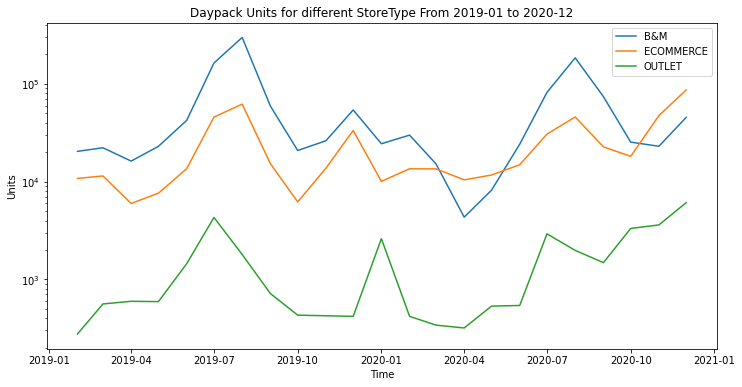

In [23]:
df2 = df1.groupby(['StoreType', 'Time']).agg({'Units':'sum'}).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for storetype in df2['StoreType'].unique().tolist():
    # storetype = 'ECOMMERCE'
    df3 = df2[(df2['StoreType']==storetype) & (df2['Time']>='2019-02-01') & (df2['Time']<'2020-12-31')].copy().reset_index()
    ax.plot(df3['Time'], df3['Units'], label=storetype)
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel('Units')
ax.set_title('Daypack Units for different StoreType From 2019-01 to 2020-12')

### From this plot, we can find that:
* Store type B&M and Ecommerce has yearly periodicity which is the units sales peak aroud June and July then dip around April; the outlet does not have the yearly periodicity.
* The B&M and Ecommerce have the similar trends.
* B&M has the deepest dip at 2020/April, I think there are 2 factors, one is due to seasonal influence, the other one is influneced by Covid-19. 
* At the same time, Ecommerce has the shallow dip at 2020/April. However, the dip is higher than that at the same time  2019, also higher than that of B&M at the same time, I believe the reason is more customers change their shopping behavoiur, more shopping online than come to shop.
* For Outlet sales, from 2020 May, it went up, which is very different from that at the same time 2019.

## 2019 vs 2020 daypack units comparison

In [26]:
df1['Month1'] = df1['Time'].astype(str).str[5:7]

In [34]:
df4_2019 = df1[(df1['Time']>='2019-01-01') & (df1['Time']<'2021-01-01')]\
            .sort_values(['Year','Month1'])\
            .groupby(['Year','Month1','Month'], sort=False)\
                .agg({'Units': 'sum'})\
                .reset_index()
df4_2019['Month1'] = df4_2019['Month1'].astype(int).apply(lambda x: (x + 10) % 12)
df4_2019 = df4_2019.sort_values(['Year', 'Month1']).reset_index(drop=True)

labels = df4_2019[df4_2019['Year'].astype(str)=='2019']['Month'].tolist()
df_19 = df4_2019[df4_2019['Year'].astype(str)=='2019']['Units'].tolist()
df_20 = df4_2019[df4_2019['Year'].astype(str)=='2020']['Units'].tolist()


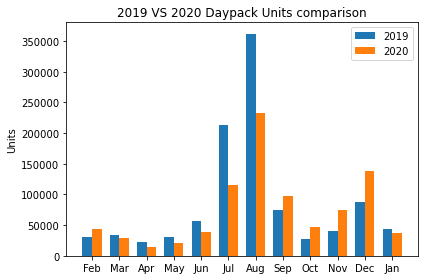

In [35]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_19, width, label='2019')
rects2 = ax.bar(x + width/2, df_20, width, label='2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Units')
ax.set_title('2019 VS 2020 Daypack Units comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

* There is a clear periodicity for 2019 and 2020.
* From March to Aug, total daypack units sales in 2019 is more than 2020; particularly in July and Aug, units sales in 2019 is tremendously higher than 2020. We need to investigate further for the reason.
* From Sep to Dec., total daypack units sales in 2020 is more than 2019. Maybe one of the reasons is due to covid-19, people stay at home for long time need to go outside to have a relax and enjoy natural life. We need to investigate more on that.


Covid makes Ecommerce outperforms B&M
* B&M & Ecommerce have similar trends.
* At 2020/April when it locked down, Ecommerce outperfoms B&M even at a seasonal dip.

Daypack sales more after covid summer vacation
* Covid summer vacation is a watershed.
* The outperforming trend keeps until Christmas

Findings:
At 2020 April, E-commerce has outperformed B&M. I think there are 2 factors, seasonal influence and Covid-19 caused this phenomenon. At the same time, Ecommerce has the shallow dip at 2020/April. However, the dip is higher than that at the same time  2019, also higher than that of B&M at the same time, I believe the reason is more customers change their shopping behavoiur, more shopping online than come to shop. 

From Sep to Dec., total daypack units sales in 2020 is more than 2019. Maybe one of the reasons is due to covid-19, people stay at home for long time need to go outside to have a relax and enjoy natural life. 